# Logistic Regression

In this section we will be using Logistic Regression to perform classification of a data set. In this lecture, we will focus on binary classification, so that we have two outputs, a positive and negative, (1 or 0).

    1. Basic Mathematical Overview of the Logistic Function
    2. Extra Math Resources
    3. DataSet Analysis
    4. Data Visualization
    5. Data Preparation
    6. Multicollinearity Consideration
    7. Logistic Regression with SciKit Learn
    8. Testing and Training Data Sets
    9. Conclusion and More Resources

In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/alenamclucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### 1. Basic Mathematical Overview of the Logistic Function

The logistics function can take an input from negative to positive infinity and it always has an output between 0 and 1. His notebook has the equation and general look (like an s). F(x) is the probability that the dependent variable is a success case.

For our logistics function, if we view t as a linear function with a variable x we could express t as t = beta0 + beta1(x).

### 3. DataSet Analysis

Info on data: http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html and study: https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf. Self-reporting survey in the mid 70s.

Given certain variables about a woman, can we predict if she has or has not had an affair?

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair, 4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs



### 4. Data Visualization

In [4]:
# how to load datasets from statsmodel directly into dataframe
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
# check if person has had an affair
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
    
# create new affair column and check to see if they have an affair,
# set to binary
df['had_affair'] = df['affairs'].apply(affair_check)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
# takes mean of each group of affair and non-affair
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


/Users/alenamclucas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/alenamclucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


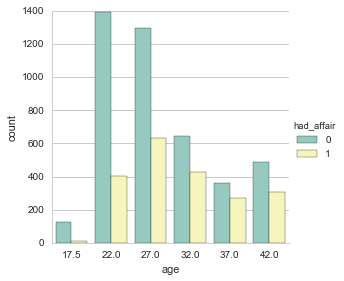

In [13]:
# visualize before machine learning
sns.factorplot('age',data=df.sort('age'),hue='had_affair',
               palette='Set3',kind='count')

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


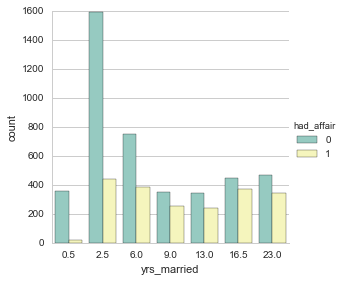

In [14]:
sns.factorplot('yrs_married',data=df.sort('yrs_married'),
               hue='had_affair',palette='Set3',kind='count')

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


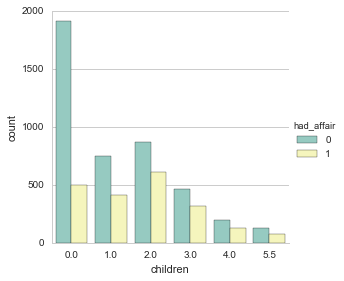

In [16]:
sns.factorplot('children',data=df.sort('children'),hue='had_affair',
               palette='Set3',kind='count')

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


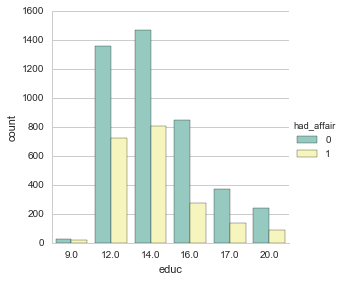

In [17]:
sns.factorplot('educ',data=df.sort('educ'),hue='had_affair',
               palette='Set3',kind='count')

### Part 5: Data Preparation

Note that occupation and husband's occupation are categorical variables.

In [20]:
# creates dataframe of six columns for every number it could be and it can
# either be 1 for yes or 0 for no
# helps to not confuse regression into thinking it's a regular variable
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
# rename colums of both dummy variables
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4',
                           'hocc5', 'hocc6']

# drop old categorical variables and number of years had affair
x1 = df.drop(['occupation','occupation_husb','had_affair'],axis=1)

# concatenate dummies together and combine with rest of data
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)
x1 = pd.concat([x1,dummies],axis=1)
x1.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# set up y/dependent variable
y1 = df.had_affair
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

### Part 6: Multicolinearity Consideration

We will drop columns because of multicolinearity. The dummy variables we made are strongly correlated because they have a relationship to each other (only one of the occ and hocc columns can be 1). We do this at the cost of losing a data point.

In [46]:
# drop occ1 and hocc1 to avoid multicolinearity
# drop affairs column because it's a repeat of our target (y)
x1 = x1.drop(['occ1','hocc1','affairs'],axis=1)

x1.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
# need 1D array to use with scikit learn, numpy has a method
# returns array of just 1s and 0s together
y1 = np.ravel(y1)
y1

array([1, 1, 1, ..., 0, 0, 0])

### Part 7: Logistic Regression with SciKit Learn

In [48]:
log_model = LogisticRegression()

log_model.fit(x1,y1)

# 73% accuracy rating
log_model.score(x1,y1)

0.72588752748978946

In [49]:
# checking the null error rate
# 32% of women who had affairs
y1.mean()

0.32249450204209867

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.

In [51]:
coeff_df = DataFrame(dict(zip(x1.columns,np.transpose(log_model.coef_))))
coeff_df

,age,children,educ,hocc2,hocc3,hocc4,hocc5,hocc6,occ2,occ3,occ4,occ5,occ6,rate_marriage,religious,yrs_married
0,-0.056379,0.018154,0.008722,0.218782,0.324633,0.188452,0.21201,0.214896,0.298034,0.607985,0.346297,0.942565,0.906354,-0.697955,-0.368536,0.10393


occ1 and hocc1 must have had a negative relationship. Look at these coefficients like we do for linear regression.

### Part 8: Testing and Training Data Sets

In [53]:
# create training and testing set for xs and ys
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1)

# new model and fit using training sets
log_model2 = LogisticRegression()
log_model2.fit(x1_train,y1_train)

# ran a prediction using x test
class_predict = log_model2.predict(x1_test)

# compare y test to prediction, get similar accuracy score
print metrics.accuracy_score(y1_test,class_predict)

0.713567839196


### Part 9: Conclusion

Could try some regularization using a non-linear model. Could try using different features/attributes/xs.